Check that **nltk** is already installed from Anaconda Navigator under the **Environments** tab.

![]( 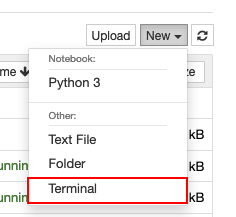)

Create a new Terminal in Jupyter Notebook and type these commands

`
pip install -U pip setuptools wheel
pip install -U spacy
python -m spacy download en_core_web_sm
`

In [1]:
import nltk
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import opinion_lexicon
from nltk.corpus import wordnet as wn
import pandas as pd

# Working With Sentiment Lexicon

## Opinion Lexicon

In [3]:
#function to load the lexicon 
def load_words(path):
    words = []
    with open(path, 'r', encoding='ISO-8859-1') as file:
        lines = file.readlines()
        for line in lines:
            line = line.strip()
            if len(line) > 0 and not line.startswith(";"):
                words.append(line)
                
    return words

In [4]:
#unzip the 2 files to opinion-lexicon-English folder 
#and load the opinion lexicon from negative-words.txt and positive-words.txt
lexicon_path = "opinion-lexicon-English"
neg_words = load_words(f"{lexicon_path}/negative-words.txt")
pos_words = load_words(f"{lexicon_path}/positive-words.txt")
print("First 6 negative words:", neg_words[:6])
print("First 6 positive words:", pos_words[:6])

First 6 negative words: ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably']
First 6 positive words: ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable']


In [5]:
#alternatively the opinion-lexicon has also been included in the NLTK corpus
opinion_lexicon.words()

['2-faced', '2-faces', 'abnormal', 'abolish', ...]

In [6]:
#negative/positive words
print("First 6 negative words:", opinion_lexicon.negative()[:6])
print("First 6 positive words:", opinion_lexicon.positive()[:6])

First 6 negative words: ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably']
First 6 positive words: ['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable']


#### ❓Exercise 1. Complete this function `get_sentiment_score()` that will take in a sentence, pos_words, neg_words and returns a sentiment score by counting the number of positive and negative words. Each positive word will +1 to the score and -1 for each negative word.

*Hint: Use the `nltk.word_tokenize()` function to tokenize the sentence and then convert to lower case*

In [8]:
nltk.word_tokenize("I HATE IT THAT I LOVE YOU")

['I', 'HATE', 'IT', 'THAT', 'I', 'LOVE', 'YOU']

In [9]:
"I HATE IT THAT I LOVE YOU".lower()

'i hate it that i love you'

In [35]:
def get_sentiment_score(sentence, pos_words, neg_words):
    score = 0
    tokens = nltk.word_tokenize(sentence)
    
    #TODO
    for t in tokens:
        t = t.lower()
        if t in pos_words:
            #print(t + " is a positive word")
            score += 1
            continue
        
        if t in neg_words:
            #print(t + " is a negative word")
            score -= 1
            continue
    
    return score

In [15]:
get_sentiment_score("i believe in hate at first sight!", pos_words, neg_words)

hate is a negative word


-1

In [16]:
get_sentiment_score("cool pics^) I love it", pos_words, neg_words)

cool is a positive word
love is a positive word


2

In [17]:
get_sentiment_score("I HATE IT THAT I LOVE YOU", pos_words, neg_words)

hate is a negative word
love is a positive word


0

In [18]:
get_sentiment_score("UK is already in a recession, new data from Bank of England indicates", pos_words, neg_words)

recession is a negative word


-1

In [19]:
sentences = ["i believe in hate at first sight!",
             "cool pics^) I love it", 
             "I HATE IT THAT I LOVE YOU", 
             "UK is already in a recession, new data from Bank of England indicates"]

In [20]:
#set the display.max_colwidth so that the sentences are not truncated
pd.set_option("display.max_colwidth", None)
pd.DataFrame({"sentence": sentences, "score": [get_sentiment_score(s, pos_words, neg_words) for s in sentences]})

hate is a negative word
cool is a positive word
love is a positive word
hate is a negative word
love is a positive word
recession is a negative word


,sentence,score
0,i believe in hate at first sight!,-1
1,cool pics^) I love it,2
2,I HATE IT THAT I LOVE YOU,0
3,"UK is already in a recession, new data from Bank of England indicates",-1


## SentiWordNet

In [21]:
#note that when getting the synset from WordNet or SentiWordNet, we need to specify 3 things
#word
#pos_tag (a = adjective, r = adverb, n = noun, v = verb)
#synset number
small_score = swn.senti_synset("small.a.01")
print("word: small", 
      ", positivity:", small_score.pos_score(), 
      ", negativity:", small_score.neg_score(), 
      ", objectivity:", small_score.obj_score())

word: small , positivity: 0.0 , negativity: 0.375 , objectivity: 0.625


![](  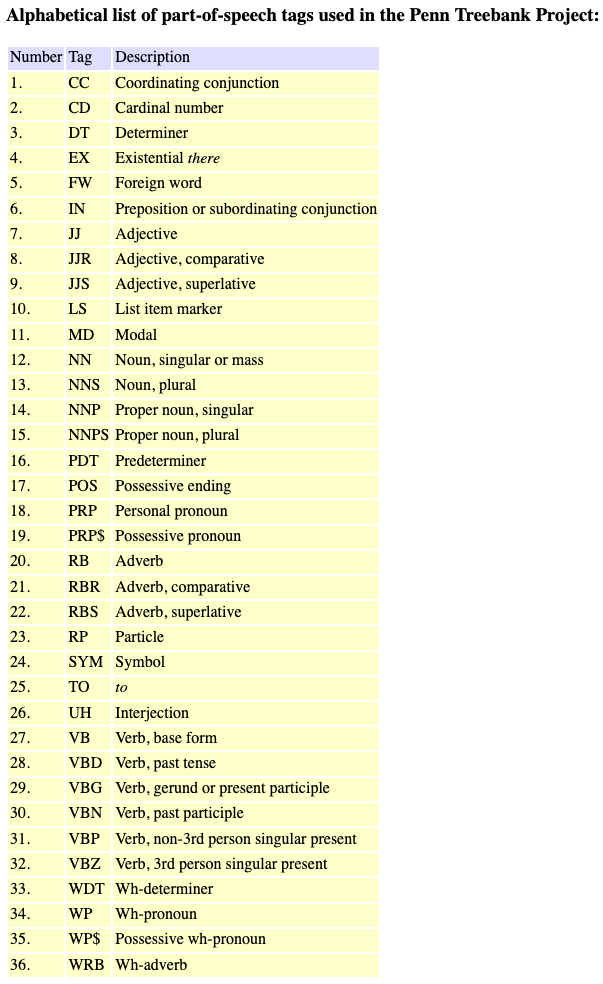)

Note that many of the POS tagger (e.g. NLTK) using the Penn Treebank tagset. To convert to the format needed by WordNet/SentiWordNet, a quick and dirty way is to take the first letter of the POS tag (converted to lower case).

In [23]:
tokens = nltk.pos_tag(nltk.word_tokenize("He is happy!"))
tokens

[('He', 'PRP'), ('is', 'VBZ'), ('happy', 'JJ'), ('!', '.')]

In [24]:
def convert_to_swn(pos_token):
    pos_tag = pos_token[1][0].upper()
    
    tag_dict = {"J": wn.ADJ,
                "N": wn.NOUN,
                "V": wn.VERB,
                "R": wn.ADV}

    #if can't find a match, just treat it as noun
    return pos_token[0].lower() + "." + tag_dict.get(pos_tag, wn.NOUN) + ".01"

In [25]:
print(tokens[2])

('happy', 'JJ')


In [26]:
print(convert_to_swn(tokens[2]))

happy.a.01


#### ❓Exercise 2. Complete this function `get_sentiment_orientation()` that will take in a sentence and uses SentiWordNet to returns a tuple with dictionary with the average positivity and negativitiy scores (e.g. `{"p": 0.3, "n": 0.1, polarity: "positive"}`)

*Hint: Use the `convert_to_swn` function to obtain the format required by SentiWordNet

In [27]:
nltk.pos_tag(nltk.word_tokenize("He is happy!"))

[('He', 'PRP'), ('is', 'VBZ'), ('happy', 'JJ'), ('!', '.')]

In [34]:
def get_sentiment_orientation(sentence):
    p_score = 0
    n_score = 0
    count = 0
    words = nltk.pos_tag(nltk.word_tokenize(sentence))
    
    #TODO
    for token in words:
        wordnet_word = convert_to_swn(token)
        try:
            word_score = swn.senti_synset(wordnet_word)
            #print(word_score)
            p_score += word_score.pos_score()
            n_score += word_score.neg_score()
            count += 1
        except:
            pass
    
    polarity = "neutral"
    if count > 0:
        if p_score > n_score:
            polarity = "positive"
        elif n_score > p_score:
            polarity = "negative"
            
        return {"p": p_score / count , "n": n_score / count , "polarity": polarity}
    else:
        return {"p": 0 , "n": 0 , "polarity": polarity}

In [32]:
print(sentences[3])
get_sentiment_orientation(sentences[3])

UK is already in a recession, new data from Bank of England indicates
<united_kingdom.n.01: PosScore=0.0 NegScore=0.0>
<already.r.01: PosScore=0.125 NegScore=0.0>
<inch.n.01: PosScore=0.0 NegScore=0.0>
<angstrom.n.01: PosScore=0.0 NegScore=0.0>
<recession.n.01: PosScore=0.0 NegScore=0.0>
<new.a.01: PosScore=0.375 NegScore=0.0>
<data.n.01: PosScore=0.0 NegScore=0.0>
<bank.n.01: PosScore=0.0 NegScore=0.0>
<england.n.01: PosScore=0.0 NegScore=0.0>


{'p': 0.05555555555555555, 'n': 0.0, 'polarity': 'positive'}

In [33]:
sentence_orientations = [get_sentiment_orientation(s) for s in sentences]
pd.DataFrame({"sentence": sentences, 
              "positivity": [entry["p"] for entry in sentence_orientations], 
              "negativity": [entry["n"] for entry in sentence_orientations],
              "polarity":  [entry["polarity"] for entry in sentence_orientations]})

<iodine.n.01: PosScore=0.0 NegScore=0.0>
<believe.v.01: PosScore=0.125 NegScore=0.0>
<inch.n.01: PosScore=0.0 NegScore=0.0>
<hate.n.01: PosScore=0.125 NegScore=0.375>
<astatine.n.01: PosScore=0.0 NegScore=0.0>
<first.a.01: PosScore=0.0 NegScore=0.0>
<sight.n.01: PosScore=0.0 NegScore=0.0>
<cool.a.01: PosScore=0.25 NegScore=0.125>
<iodine.n.01: PosScore=0.0 NegScore=0.0>
<love.v.01: PosScore=0.5 NegScore=0.0>
<information_technology.n.01: PosScore=0.0 NegScore=0.0>
<iodine.n.01: PosScore=0.0 NegScore=0.0>
<hate.v.01: PosScore=0.0 NegScore=0.75>
<information_technology.n.01: PosScore=0.0 NegScore=0.0>
<iodine.n.01: PosScore=0.0 NegScore=0.0>
<love.v.01: PosScore=0.5 NegScore=0.0>
<united_kingdom.n.01: PosScore=0.0 NegScore=0.0>
<already.r.01: PosScore=0.125 NegScore=0.0>
<inch.n.01: PosScore=0.0 NegScore=0.0>
<angstrom.n.01: PosScore=0.0 NegScore=0.0>
<recession.n.01: PosScore=0.0 NegScore=0.0>
<new.a.01: PosScore=0.375 NegScore=0.0>
<data.n.01: PosScore=0.0 NegScore=0.0>
<bank.n.01: Pos

,sentence,positivity,negativity,polarity
0,i believe in hate at first sight!,0.035714,0.053571,negative
1,cool pics^) I love it,0.187500,0.031250,positive
2,I HATE IT THAT I LOVE YOU,0.100000,0.150000,negative
3,"UK is already in a recession, new data from Bank of England indicates",0.055556,0.000000,positive


## Working with documents

In [36]:
#Taken from 
#https://www.channelnewsasia.com/asia/boat-capsizes-cambodia-23-chinese-nationals-missing-official-2960336

news_article1 = """
PHNOM PENH: More than 20 Chinese nationals are missing after a boat capsized off the coast of Cambodia, an official said on Friday (Sep 23).

The boat carrying 41 Chinese people got into difficulties off Sihanoukville on Thursday, provincial spokesman Kheang Phearom told AFP, and only 18 of those on board had been rescued.

The once-quiet fishing village of Sihanoukville has been transformed by a Chinese investment boom in recent years, with dozens of casinos opening.

But there have been growing reports of Chinese workers being trafficked or smuggled to work in the city illegally.

Kheang Phearom said that police were questioning those they had rescued while the search for the others continued.

"We are searching for the 23 who went missing," he said.

Provincial police chief Chuon Narin told pro-government media outlet Fresh News that a representative of the group told police they left China from a port in Guangdong province by speedboat on Sep 11.

Nearly a week later, they were transferred to a wooden boat with two Cambodian crew members in international waters, the police chief said, and that vessel began to sink after breaking down on Thursday.

He said that a fishing boat picked up the two Cambodians and left, abandoning them and their boat in the sea.

According to Kheang Phearom, the two Cambodians had also been detained for questioning.
"""

print(news_article1)


PHNOM PENH: More than 20 Chinese nationals are missing after a boat capsized off the coast of Cambodia, an official said on Friday (Sep 23).

The boat carrying 41 Chinese people got into difficulties off Sihanoukville on Thursday, provincial spokesman Kheang Phearom told AFP, and only 18 of those on board had been rescued.

The once-quiet fishing village of Sihanoukville has been transformed by a Chinese investment boom in recent years, with dozens of casinos opening.

But there have been growing reports of Chinese workers being trafficked or smuggled to work in the city illegally.

Kheang Phearom said that police were questioning those they had rescued while the search for the others continued.

"We are searching for the 23 who went missing," he said.

Provincial police chief Chuon Narin told pro-government media outlet Fresh News that a representative of the group told police they left China from a port in Guangdong province by speedboat on Sep 11.

Nearly a week later, they were tr

In [37]:
#Taken from 
#https://www.channelnewsasia.com/asia/japan-lift-covid-19-restrictions-foreign-tourists-october-2958736

news_article2 = """

NEW YORK: Japan announced on Thursday (Sep 22) that it will lift tough COVID-19 restrictions on foreign tourists, reopening the borders after two and a half years.

Speaking at the New York Stock Exchange, Prime Minister Fumio Kishida said the pandemic had interrupted the free flow of people, goods and capital that had helped the nation flourish.

"But from Oct 11, Japan will relax border control measures to be on par with the US, as well as resume visa-free travel and individual travel," said Kishida, who is in the city for the United Nations General Assembly.

Japan, along with China, has been a holdout in continuing tough restrictions on visitors as much of the world has moved on from the pandemic.

But unlike China, Japan never imposed a strict lockdown during the crisis.

Tourists who come to Japan will enjoy a weak yen, which has plummeted so low against the dollar that the finance ministry intervened in the currency market on Thursday for the first time since 1998.

The return of the visa-waiver programme suspended in March 2020 will restore the ease of access that saw a record 31.9 million foreign visitors to the country in 2019.

Since June, Japan has allowed tourists to visit in groups accompanied by guides, a requirement that was further relaxed to include self-guided package tours.

The cautious approach to reopening has been deliberate, said James Brady, Japan analysis lead at US-based consultancy Teneo.

Kishida "took office a year ago knowing that perceived mishandling of the pandemic had been a key factor in undermining public confidence" in his predecessor's government, Brady told AFP.

"He has been extremely careful not to repeat those mistakes."

Japan has recorded around 42,600 coronavirus deaths in total - a vastly lower rate than many other countries - and 90 per cent of residents aged 65 and over have had three vaccine shots.

There is no law requiring people to wear masks, but they are still near-ubiquitous in public places like trains and shops, with many Japanese willing to sport masks when ill even before the pandemic.

While the return of mass tourism should give a "slight bump" to Japan's economy, the benefits are likely to be limited by China's zero-COVID policy, Brady said.

"Much of the economic benefit pre-pandemic came from high numbers of Chinese visitors coming and spending lots of money on tech products, cosmetics," he explained.

But "currently, Chinese citizens face their own travel restrictions at home and won't be travelling to Japan in large numbers".

There is pent-up demand for travel to the country, however, according to Olivier Ponti, vice president of insights for travel analytics firm ForwardKeys.

"Searches for travel to Japan reached their highest point this year at the end of August," and while flight bookings were just 16 per cent of 2019 levels in early September, "we'd expect bookings to jump" when the visa rules are scrapped, Ponti said.

Demand from Europe may still be subdued "due to the increase in the cost of living in Europe caused by the Russian-Ukraine crisis plus the rising fuel costs driving up air travel costs," said Liz Ortiguera, CEO of the Pacific Asia Travel Association.
"""
print(news_article2)



NEW YORK: Japan announced on Thursday (Sep 22) that it will lift tough COVID-19 restrictions on foreign tourists, reopening the borders after two and a half years.

Speaking at the New York Stock Exchange, Prime Minister Fumio Kishida said the pandemic had interrupted the free flow of people, goods and capital that had helped the nation flourish.

"But from Oct 11, Japan will relax border control measures to be on par with the US, as well as resume visa-free travel and individual travel," said Kishida, who is in the city for the United Nations General Assembly.

Japan, along with China, has been a holdout in continuing tough restrictions on visitors as much of the world has moved on from the pandemic.

But unlike China, Japan never imposed a strict lockdown during the crisis.

Tourists who come to Japan will enjoy a weak yen, which has plummeted so low against the dollar that the finance ministry intervened in the currency market on Thursday for the first time since 1998.

The return

### Opinion Lexicon vs SentiWordNet

Opinion lexicon seems to work better even though it is simpler in nature.

In [38]:
get_sentiment_score(news_article1, pos_words, neg_words)

-1

In [39]:
get_sentiment_orientation(news_article1)

{'p': 0.005263157894736842, 'n': 0.010526315789473684, 'polarity': 'negative'}

In [40]:
get_sentiment_score(news_article2, pos_words, neg_words)

5

In [41]:
get_sentiment_orientation(news_article2)

{'p': 0.044061302681992334, 'n': 0.04741379310344827, 'polarity': 'negative'}